[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving Product_Reviews.csv to Product_Reviews.csv
Index(['Product ID', 'Product Review', 'Sentiment'], dtype='object')


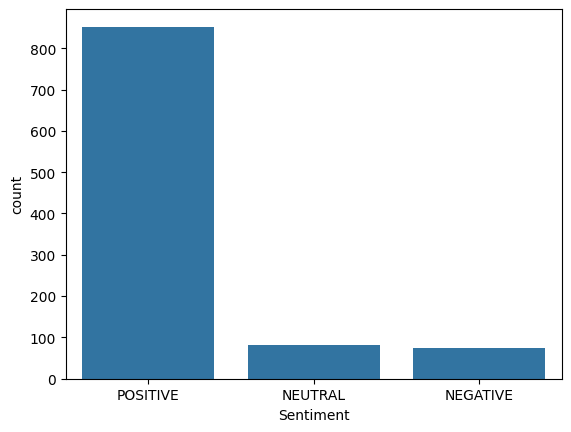

running->run
studies->studi
flies->fli
easily->easili
happiness->happi


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import PorterStemmer
uploaded=files.upload()
df=pd.read_csv('/content/Product_Reviews.csv')
df.head()
data=df.drop_duplicates()
df.duplicated().sum()
print(df.columns)
sns.countplot(data=df, x='Sentiment')
plt.show()
data['Sentiment'].value_counts(normalize=True)
def remove_special_characters(text):
  pattern='[^A-Za-z0-9]+'
  new_text=''.join(re.sub(pattern,' ',text))
  return new_text
df['cleaned_text']=df['Product Review'].apply(remove_special_characters)
df['cleaned_text']=df['cleaned_text'].str.lower()
df.loc[0:3,['Product Review','cleaned_text']]
df['cleaned_text']=df['cleaned_text'].str.strip()
df.loc[0:3 ,['Product Review','cleaned_text']]
def remove_stopwords(text):
  words=text.split()
  new_text=' '.join([word for word in words if word not in stopwords.words('english')])
  return new_text
df['cleaned_text_without_stopwords']=df['cleaned_text'].apply(remove_stopwords)
df.loc[0:3 ,['Product Review','cleaned_text','cleaned_text_without_stopwords']]
stemmer=PorterStemmer()
words=["running","studies","flies","easily","happiness"]
for word in words:
  print(f"{word}->{stemmer.stem(word)}"),

In [4]:
df.shape

(1007, 5)

In [5]:
df.head(5)

,Product ID,Product Review,Sentiment,cleaned_text,cleaned_text_without_stopwords
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE,i initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE,allow me to preface this with a little history...,allow preface little history casual reader own...
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE,i am enjoying it so far great for reading had ...,enjoying far great reading original fire since...
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE,i bought one of the first paperwhites and have...,bought one first paperwhites pleased constant ...
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE,i have to say upfront i don t like coroporate ...,say upfront like coroporate hermetically close...


In [6]:
df.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0
cleaned_text,0
cleaned_text_without_stopwords,0


In [7]:
df.duplicated().sum()

np.int64(2)

In [8]:
df = df.drop_duplicates()

df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(1005, 5)

In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer=WordNetLemmatizer()
words=["running","studies","flies","better","happiness"]
for word in words:
  print(f"{word}->{lemmatizer.lemmatize(word)}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


running->running
studies->study
flies->fly
better->better
happiness->happiness


In [10]:
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text
df['cleaned_text'] = df['Product Review'].apply(remove_special_characters)
df.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,I initially had trouble deciding between the p...,I initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,Allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,I am enjoying it so far Great for reading Had ...
3,I bought one of the first Paperwhites and have...,I bought one of the first Paperwhites and have...


In [11]:
df['cleaned_text'] = df['cleaned_text'].str.lower()
df.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...


In [16]:
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text
df['cleaned_text_without_stopwords'] = df['cleaned_text'].apply(remove_stopwords)
df.loc[0:3, ['Product Review','cleaned_text','cleaned_text_without_stopwords']]

,Product Review,cleaned_text,cleaned_text_without_stopwords
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,allow preface little history casual reader own...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,enjoying far great reading original fire since...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,bought one first paperwhites pleased constant ...


In [19]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
words=["running","studies","flies","easily","happiness"]
for word in words:
  print(f"(word)+ {stemmer.stem(word)}")

(word)+ run
(word)+ studi
(word)+ fli
(word)+ easili
(word)+ happi


In [ ]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_features = 1000)
data_features_BOW = bow_vec.fit_transform(df['cleaned_text'])
data_features_BOW = data_features_BOW.toarray()
print("Shape of the feature vector",data_features_BOW.shape)
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


Shape of the feature vector (1007, 1000)
first 10 words ['10' '100' '11' '15' '16' '17' '20' '2013' '2014' '2015']
last 10 words ['wouldn' 'writing' 'wrong' 'year' 'years' 'yes' 'yet' 'you' 'your'
 'youtube']


,10,100,11,15,16,17,20,2013,2014,2015,...,wouldn,writing,wrong,year,years,yes,yet,you,your,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,5,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
data_features_tfidf = tfidf.fit_transform(df['cleaned_text'])
data_features_tfidf = data_features_tfidf.toarray()
print("Shape of the feature vector",data_features_tfidf.shape)
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()


Shape of the feature vector (1007, 1000)
first 10 words ['10' '100' '11' '15' '16' '17' '20' '2013' '2014' '2015']
last 10 words ['wouldn' 'writing' 'wrong' 'year' 'years' 'yes' 'yet' 'you' 'your'
 'youtube']


,10,100,11,15,16,17,20,2013,2014,2015,...,wouldn,writing,wrong,year,years,yes,yet,you,your,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.156626,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.058956,0.0,0.000000,0.150509,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.251472,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.051085,0.0,0.000000,0.078250,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.043499,0.0,0.000000,0.044420,0.0,0.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
ngram = CountVectorizer(max_features = 1000,ngram_range=(1, 2))
data_features_ngram = ngram.fit_transform(df['cleaned_text'])
data_features_ngram = data_features_ngram.toarray()
print("Shape of the feature vector",data_features_ngram.shape)
words = ngram.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])
df_ngram = pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

Shape of the feature vector (1007, 1000)
first 10 words ['10' '15' '16' '20' '2013' '2015' '30' '300' 'ability' 'ability to']
last 10 words ['you are' 'you can' 'you don' 'you get' 'you have' 'you re' 'you want'
 'you will' 'your' 'youtube']


,10,15,16,20,2013,2015,30,300,ability,ability to,...,you are,you can,you don,you get,you have,you re,you want,you will,your,youtube
0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0


In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Drop missing rows (if any)
df = df.dropna(subset=['cleaned_text', 'Sentiment']).reset_index(drop=True)

# Extract texts and labels
texts = df['cleaned_text']
y = df['Sentiment']

# Vectorizations
bow_vec = CountVectorizer(max_features=1000)
df_BOW = pd.DataFrame(bow_vec.fit_transform(texts).toarray(),
                      columns=bow_vec.get_feature_names_out())

tfidf = TfidfVectorizer(max_features=1000)
df_tfidf = pd.DataFrame(tfidf.fit_transform(texts).toarray(),
                        columns=tfidf.get_feature_names_out())

ngram = CountVectorizer(max_features=1000, ngram_range=(1, 2))
df_ngram = pd.DataFrame(ngram.fit_transform(texts).toarray(),
                        columns=ngram.get_feature_names_out())
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

results = []

# 4. Training Loop
for name, X in vectorized_datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))

# 5. Sort and Display Results
results.sort(key=lambda x: x[1], reverse=True)
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")



📊 Model Performance (Macro F1-scores):

NaiveBayes - BoW              : Macro F1 = 0.5664
NaiveBayes - N-gram           : Macro F1 = 0.5238
RandomForest - BoW            : Macro F1 = 0.5006
RandomForest - TF-IDF         : Macro F1 = 0.4787
RandomForest - N-gram         : Macro F1 = 0.4787
NaiveBayes - TF-IDF           : Macro F1 = 0.3339



✅ Best Model: NaiveBayes - BoW (Macro F1 = 0.5664)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.62      0.56      0.59        18
     NEUTRAL       0.22      0.21      0.22        19
    POSITIVE       0.89      0.90      0.89       165

    accuracy                           0.81       202
   macro avg       0.58      0.56      0.57       202
weighted avg       0.80      0.81      0.80       202



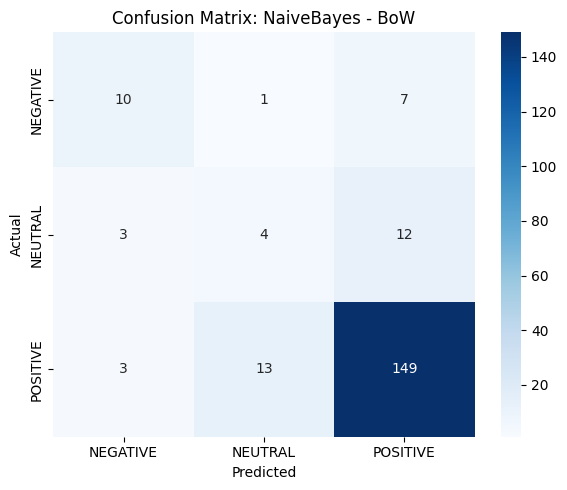

In [ ]:
# Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]
print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()